Линейная регрессия — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.
Простейшая линейная регрессия задается следующими формулами: a(x) = b0 + b1*x
                                                             y = a(x) + eps.
Где b1 вектор коэффициентов, который находится различными методами, такими как метод наименьших квадратов, а также различные методы градиентного спуска.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
data = pd.read_csv('./src/fix_data.csv')

In [3]:
from sklearn.linear_model import LinearRegression

Избавление от аномалий.
По статистике, если распределение данных приблизительно нормальное, то около 68% значений данных находятся в пределах одного стандартного отклонения от среднего, а около 95% находятся в пределах двух стандартных отклонений, и около 99,7% лежат в пределах трех стандартных отклонений. С помощью этих данных проверим наши данные на предмет аномалий, а именно зависимость размера экрана от цены.

In [4]:
screen_s = data['screen_size'].values
price = data['best_price'].values

def find_anomalies(data):
    anomalies = []
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

print(len(find_anomalies(screen_s)))

0.9669288843400761
0


Можно заметить что аномальные точки не обнаружены, что значит что данные лежат достаточно плотно

In [5]:
x = data['battery_size'].values.reshape(-1, 1)
y = data['best_price'].values
model = LinearRegression().fit(x,y)

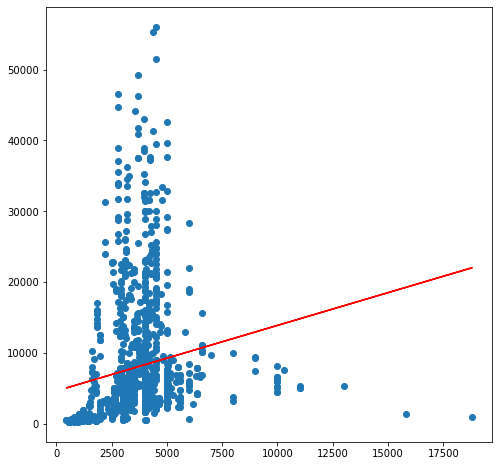

In [6]:
# new_x = np.array([x.min(), x.max()])
y_pred = model.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

Как можно заметить для пары данных "Размер батареи"-"Цена" не очень подходит линейная регрессия. Происходит это из-за того, что на рынке мобильных устройств присутствуют телефоны с аккумулятором большого объема и низкой стоимостью, но ограниченные во всех остальных возможностях по сравнению с современными смартфонами, которые составляют основную долю рынка.

Возьмем в качестве независимых переменных линейной регрессии только смартфоны на базе операционных систем Android и iOS

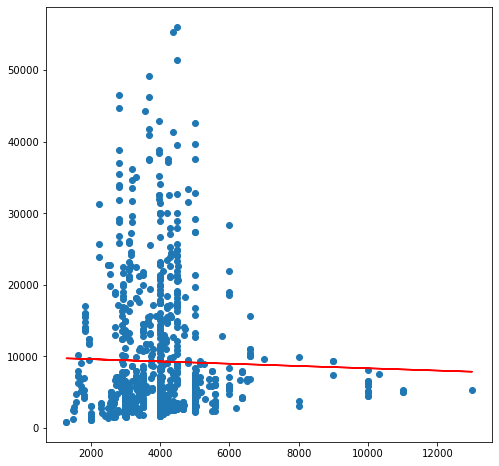

In [7]:
new_data = data[(data.os == 'iOS') | (data.os == 'Android')]
x2 = new_data.battery_size.values.reshape(-1, 1)
y2 = new_data.best_price.values
model2 = LinearRegression().fit(x2,y2)

# new_x2 = np.array([x.min(), x.max()])
y2_pred = model2.predict(x2.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='r')

Как можно заметить, если оставить только телефоны с операционными системами Android и iOS, то линейная регрессия все равно не дает удачной модели. 
Также посчитаем ошибки MSE, MAE и R2

Средняя квадратичная ошибка (англ. Mean Squared Error, MSE) MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.
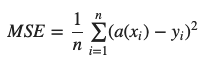

Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE).
Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — R2
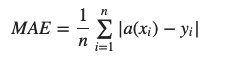

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.
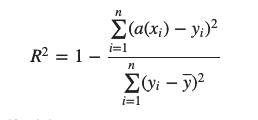

MSE:  76623350.18453366
MAE:  6264.418220819568
R2:  0.030086098544952256


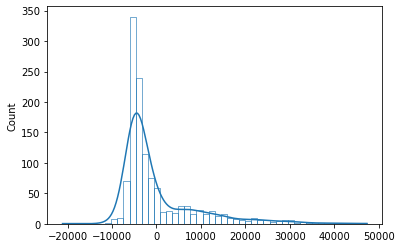

In [8]:
errors = y - y_pred
sns.histplot(data=errors, bins=50, fill=False, kde=True)
print('MSE: ', mean_squared_error(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))
print('R2: ', r2_score(y, y_pred))

### REVIEW. Автор ревью: Aladiev, дата ревью: 24/03/2021,
### Текст ревью: рекомендую всё же использовать функцию histplot из пакета seaborn. Пример: sns.histplot(data=errors, kde=True)
### Текст ответа: добавлена гистограмма из seaborn, дата ревью: 27/03/2021

Как можно заметить по всплеску в районе -10000:0 распределение ошибок немного не похоже на нормальное, что еще раз подтверждает, что линейная регрессия не подходит в данном случае
Также видно, что ошибка R2 довольно низкая 

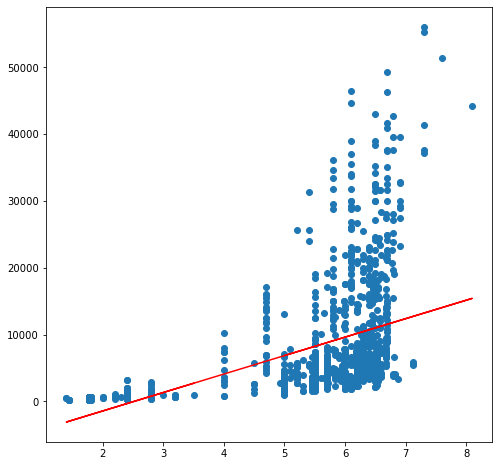

In [9]:
x3 = data.screen_size.values.reshape(-1, 1)
model3 = LinearRegression().fit(x3,y)
y3_pred = model3.predict(x3)

plt.figure(figsize=(8, 8))
plt.scatter(x3, y)
plt.plot(x3, y3_pred, color='r')

При замене независимой переменной с размера батареи на размер экрана можно заметить, что линейная регрессия всё еще не дает хороших результатов, но уже лучше, чем было до этого
Также ошибка R2 тут уже в разы выше

MSE:  62371845.00711425
MAE:  5678.3634536305335
R2:  0.21048454046830956


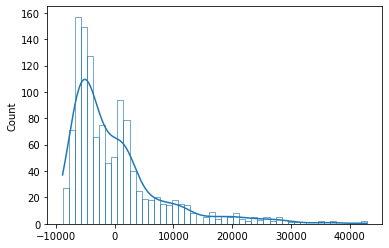

In [10]:
sns.histplot(data = y-y3_pred, bins=50, fill=False, kde=True)
print('MSE: ', mean_squared_error(y, y3_pred))
print('MAE: ', mean_absolute_error(y, y3_pred))
print('R2: ', r2_score(y, y3_pred))

Далее разделим выборку на обучающую часть и тестовую, для того, чтобы обучение модели и тестирование проходили более корректно

MSE:  53512672.115631804
MAE:  5394.302042312387
R2:  0.2177195727238468


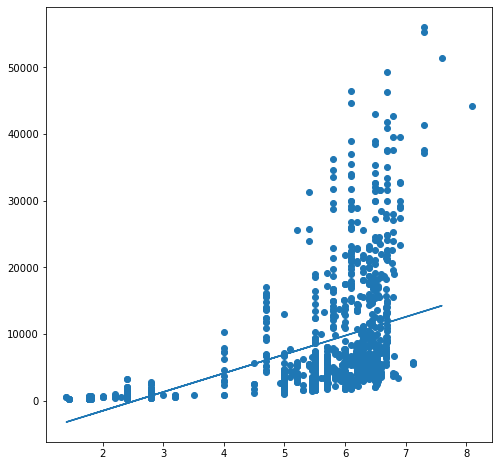

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.33, random_state = 42)
model_split = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model_split.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y)
plt.plot(x_test, y_pred)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

По ошибке R2 видно, что улучшение есть, но оно незначительно

RANSAC (аббр. RANdom SAmple Consensus) — стабильный метод оценки параметров модели на основе случайных выборок. Схема RANSAC устойчива к зашумлённости исходных данных.

Первый этап — выбор точек и подсчёт модели.
    Из множества исходных точек X случайным образом выбираются n различных точек.
    На основе выбранных точек вычисляются параметры θ модели P с помощью функции M, построенную модель принято называть гипотезой.
    
Второй этап — проверка гипотезы.
    Для каждой точки проверяется её соответствие данной гипотезе с помощью функции оценки E и порога t
    Каждая точка помечается инлаером или выбросом
    После проверки всех точек, проверяется, является ли гипотеза лучшей на данный момент, и если является, то она замещает предыдущую лучшую гипотезу.
    
Недостатки:
❑ Отсутствие верхней границы времени, необходимого для вычисления параметров модели;
❑ Для выполнения алгоритма необходимо задать конкретное пороговое значение;
❑ Методом RANSAC можно определить только одну модель для определённого набора данных.

[2812.63095855] [1095.66256385]
MSE:  70550087.8153219
MAE:  4509.872899666407
R2:  -0.03134361747595116


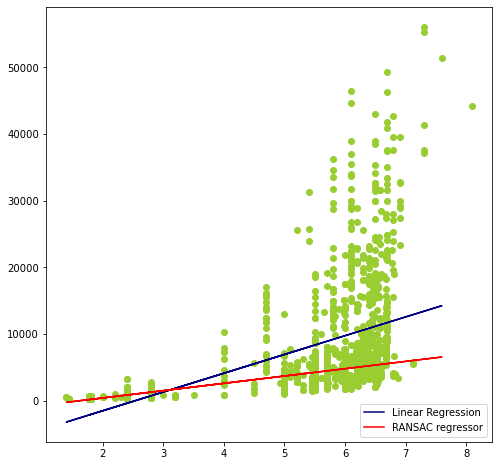

In [12]:
ransac = RANSACRegressor().fit(x_train.reshape(-1, 1), y_train)
y_ransac = ransac.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(x_test, y_ransac, color = 'red', label='RANSAC regressor')
plt.legend(loc='lower right')

print(model_split.coef_, ransac.estimator_.coef_)
print('MSE: ', mean_squared_error(y_test, y_ransac))
print('MAE: ', mean_absolute_error(y_test, y_ransac))
print('R2: ', r2_score(y_test, y_ransac))

Гребневая регрессия
Гребневая регрессия или ридж-регрессия (англ. ridge regression) — один из методов понижения размерности. Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.
Мультиколлинеарность — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата. Мультиколлинеарность может стать причиной переобучаемости модели. Избыточные коэффициенты увеличивают сложность модели машинного обучения, а также время ее обучения.
Следствием этого является плохая обусловленность матрицы 𝑋 𝑇𝑋 и неустойчивость оценок коэффициентов регрессии. Оценки, например, могут иметь неправильный знак или значения, которые намного превосходят те, которые приемлемы из физических или практических соображений

MSE:  53463458.19446086
MAE:  5322.79628120265
R2:  0.21843901142424182


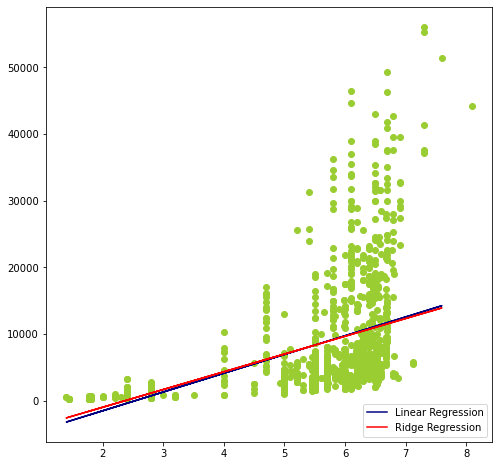

In [13]:
ridge = Ridge(alpha=105.0).fit(x_train.reshape(-1, 1), y_train)
y_ridge = ridge.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(x_test, y_ridge, color='red', label='Ridge Regression')
plt.legend(loc='lower right')

print('MSE: ', mean_squared_error(y_test, y_ridge))
print('MAE: ', mean_absolute_error(y_test, y_ridge))
print('R2: ', r2_score(y_test, y_ridge))

Коэффициент детерминации R2, при правильном подборе параметра alpha, стал чуть выше чем у обычной линейной регрессии

Регрессия Хубера.
Суть метода устойчивой регрессии заключается в уменьшении значимости отклонений, которые сильно влияют на модель. Согласно формуле ниже, если модуль отклонения меньше или равен определённого уровня, то отклонение считается не большим, и функция в этой точке считается согласно верхней строки формулы, иначе отклонение считается большим и функция в этой точке считается согласно нижней части формулы.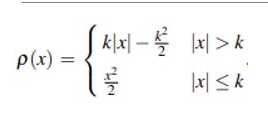

MSE:  61748369.16013531
MAE:  4486.384111756139
R2:  0.09732519979906107


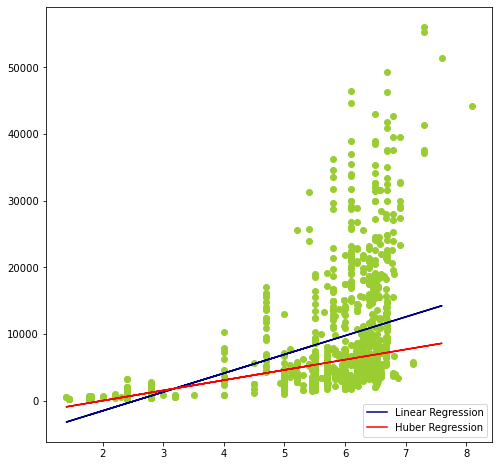

In [14]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(alpha=0).fit(x_train.reshape(-1, 1), y_train)
y_huber = huber.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(x_test, y_huber, color='red', label='Huber Regression')
plt.legend(loc='lower right')

print('MSE: ', mean_squared_error(y_test, y_huber))
print('MAE: ', mean_absolute_error(y_test, y_huber))
print('R2: ', r2_score(y_test, y_huber))

При правильном подборе aplha можно добиться максимального значениz от функции потерь Хубера, но R2 тут значительно меньше чем у обычной линейной регрессии

Lasso Regression.
Метод регрессии “лассо” (LASSO, Least Absolute Shrinkage and Selection Operator) заключается во введении дополнительного слагаемого регуляризации в функционал оптимизации модели, что часто позволяет получать более устойчивое решение. Условие минимизации квадратов ошибки при оценке параметров выражается следующей формулой:
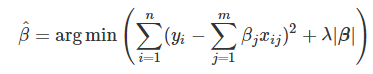
Преимущества:
• Прочная математическая основа.
• Более простая интерпретация по сравнению с МНК или Гребневой (Ridge) регрессией.

Недостатки:
• Как правило, зависимости имеют нелинейный характер => модель не сможет описать такую зависимость.
• Чувствителен к выбросам.
• Не имеет аналитического решения.
• Общее число отобранных переменных не может превышать размера обучающей выборки.

C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23037549333.11594, tolerance: 579680543.2735976
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21504590284.60904, tolerance: 540874698.0397561
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22812156013.726017, tolerance: 581720298.7394971
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

MSE:  53506919.46535429
MAE:  5390.045968120958
R2:  0.21780366842565235


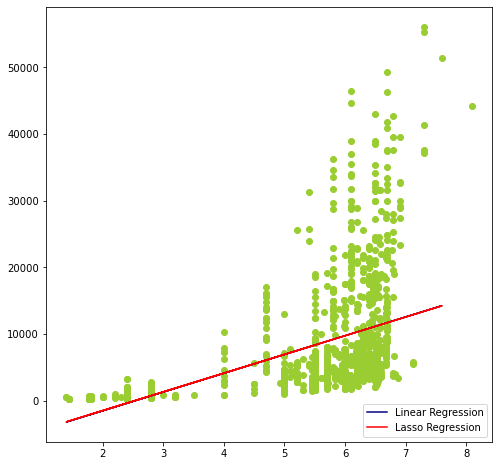

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter = 10000, tol = 0.01)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5) 
lasso_regressor.fit(x_train.reshape(-1, 1), y_train)

y_lasso = lasso_regressor.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(x_test, y_lasso, color='red', label='Lasso Regression')
plt.legend(loc='lower right')

print('MSE: ', mean_squared_error(y_test, y_lasso))
print('MAE: ', mean_absolute_error(y_test, y_lasso))
print('R2: ', r2_score(y_test, y_lasso))

Elastic Net - модель регрессии с двумя регуляризаторами l1, l2.
Пусть известны измерения n объектов. Каждый объект представим в виде пары:

Для удобства будем записывать это в матричном виде: (X, y) . Классическая задача регрессии ставится следующим образом
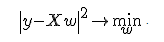
В силу неточности измерений данных или каких либо еще ошибок с целью построения наилучшей модели вводят регуляризатор или несколько регуляризаторов. Тогда получается следующая задача оптимизации:
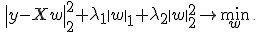
Частными случаями являются модели лассо (\lambda_2 = 0) и гребневой регрессии (\lambda_1 = 0 ).

C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22130137422.71984, tolerance: 5509936.083618537
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19633886729.92461, tolerance: 5007987.677960325
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20859424215.70912, tolerance: 5247139.617903415
  model = cd_fast.enet_coordinate_descent(
C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

MSE:  53498212.94945165
MAE:  5383.027229460417
R2:  0.21793094551182912


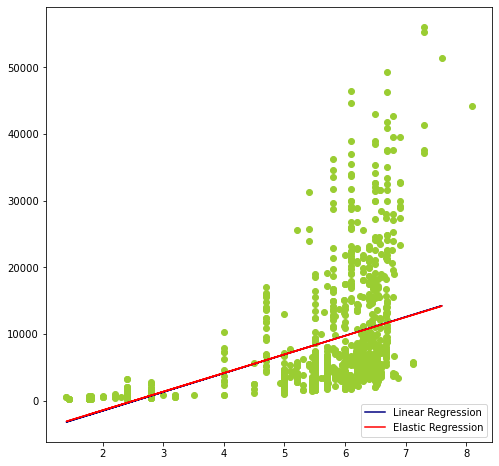

In [16]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 2e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters, cv=4) 
elastic_regressor.fit(x_train.reshape(-1,1), y_train)

y_elastic = elastic_regressor.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(x_test, y_elastic, color='red', label='Elastic Regression')
plt.legend(loc='lower right')

print('MSE: ', mean_squared_error(y_test, y_elastic))
print('MAE: ', mean_absolute_error(y_test, y_elastic))
print('R2: ', r2_score(y_test, y_elastic))

Полиномиальная регрессия — продвинутая версия линейной регрессии. Цель полиномиальной регрессии найти не просто линию, характеризующую данные, а некоторый полином n-й степени.
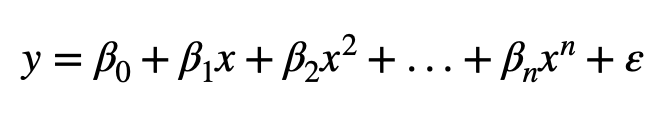
Плюсы:
    Лучше отражает зависимости, поскольку большая часть из них нелинейны.
    Может хорошо представлять даже не полиномиальные зависимости.

Минусы:
    Не является устойчивой к выбросам.
    Может быть сложно правильно подобрать степень многочлена.

MSE:  46637621.27206076
MAE:  4892.836516890643
R2:  0.3182232010949476


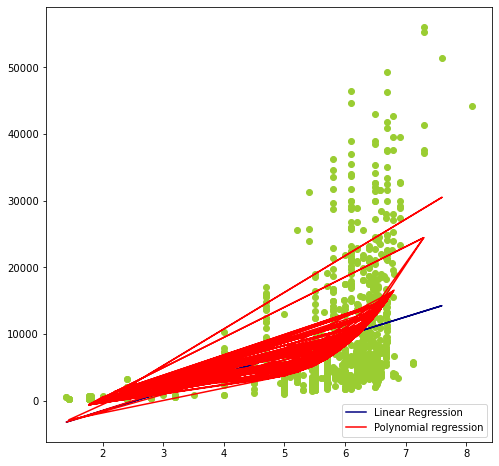

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_train.reshape(-1, 1))
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train)

y_poly = poly_reg.predict(poly.fit_transform(np.sort(x_test).reshape(-1, 1)))

plt.figure(figsize=(8,8))
plt.scatter(x3, y, color='yellowgreen')
plt.plot(x_test, y_pred, color='navy', label='Linear Regression')
plt.plot(np.sort(x_test).reshape(-1, 1), y_poly, color = 'red', label = 'Polynomial regression')
plt.legend(loc='lower right')

print('MSE: ', mean_squared_error(y_test, y_poly))
print('MAE: ', mean_absolute_error(y_test, y_poly))
print('R2: ', r2_score(y_test, y_poly))

Из-за особенностей jupyter notebook рисунок полиномиальной регрессии отображается слегка :) некорректно, но по оценке R2 можно заметить, что при подобранной степени полинома она стала самой высокой среди всех используемых методов.
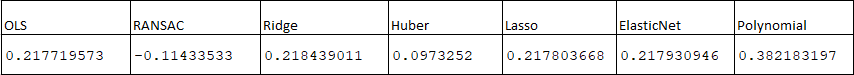

Классификация — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

ПОСТАНОВКА ЗАДАЧИ
Попробуем с помощью классификации на имеющемся датасете получить классы спроса на смартфоны

K-БЛИЖАЙШИХ СОСЕДЕЙ

Метод k-ближайших соседей — метрический алгоритм для автоматической классификации объектов или регрессии.

В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны.

Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния; классический вариант такой функции — евклидова метрика.

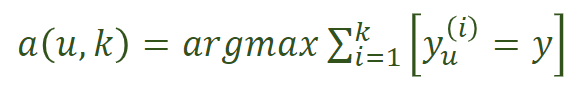

ВЗВЕШЕННЫЙ МЕТОД

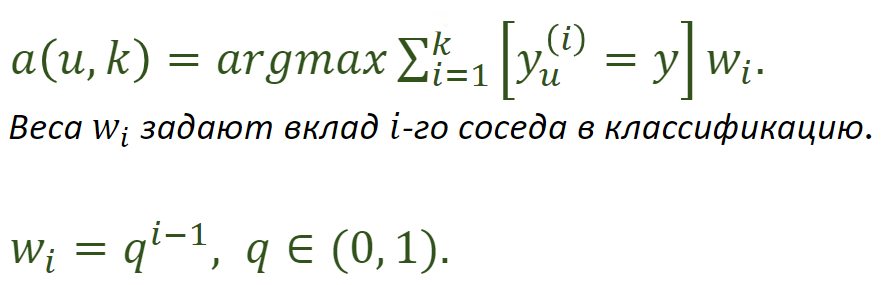

Недостатки:

1. Хранение всей обучающей выборки
2. Cравнение классифицируемого объекта со всеми объектами выборки
3. Мало параметров для настройки алгоритма по данным

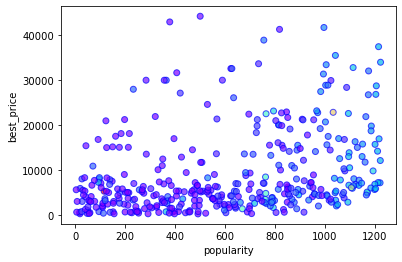

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = data['best_price'].values
x = data['popularity'].values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=50)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train.reshape(-1, 1), y_train)
y = neigh.predict(x_test.reshape(-1, 1))

plt.xlabel('popularity')
plt.ylabel('best_price')
plt.scatter(x_test.reshape(-1, 1), y_test, c=neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

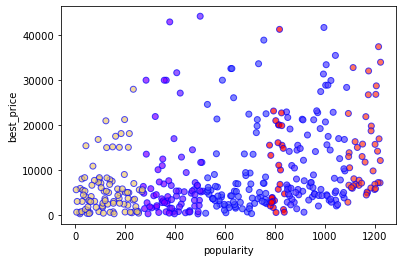

In [19]:
from sklearn.neighbors import RadiusNeighborsClassifier

r_neigh = RadiusNeighborsClassifier(radius = 250)
r_neigh.fit(x_train.reshape(-1, 1), y_train)
y = r_neigh.predict(x_test.reshape(-1, 1))

plt.xlabel('popularity')
plt.ylabel('best_price')
plt.scatter(x_test.reshape(-1, 1), y_test, c=r_neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

МЕТОД ОПОРНЫХ ВЕКТОРОВ (англ. SVM, support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа.
Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, создающая наибольшее расстояние до двух параллельных гиперплоскостей. Алгоритм основан на допущении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

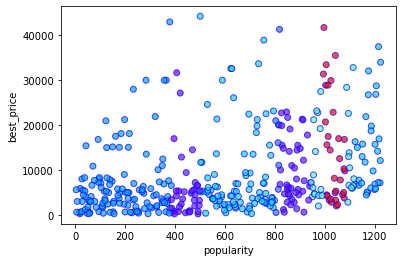

In [20]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf',degree=2, gamma='scale')
clf.fit(x_train.reshape(-1, 1), y_train)

plt.xlabel('popularity')
plt.ylabel('best_price')
plt.scatter(x_test.reshape(-1, 1), y_test, c=clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

C:\Users\mrfre\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


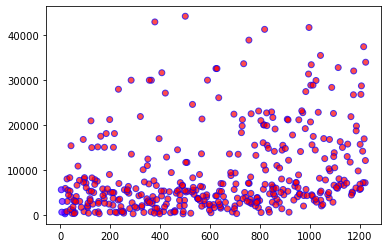

In [25]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(max_iter=10000)
lin_clf.fit(x_train.reshape(-1, 1), y_train)

plt.scatter(x_test.reshape(-1, 1), y_test, c=lin_clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных жизненных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

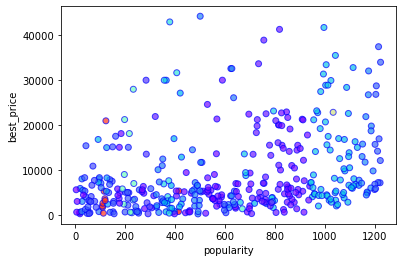

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(x_train.reshape(-1, 1), y_train)

plt.xlabel('popularity')
plt.ylabel('best_price')
plt.scatter(x_test.reshape(-1, 1), y_test, c=gnb.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.
Подобные деревья решений широко используются в интеллектуальном анализе данных. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.
Каждый лист представляет собой значение целевой переменной, изменённой в ходе движения от корня по листу. Каждый внутренний узел соответствует одной из входных переменных.

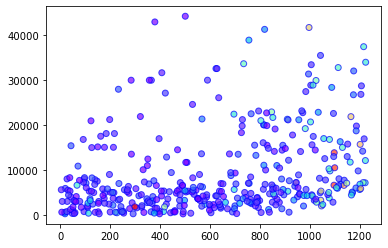

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train.reshape(-1, 1), y_train)
y = dtc.predict(x_test.reshape(-1, 1))

plt.scatter(x_test.reshape(-1, 1), y_test, c=dtc.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

Посмотрев на работу всех методов, можно сделать вывод, что лучше всех с классификацией в этом случае справляется метод ближайших соседей по радиусу, там классы визуально обособлены лучше всего

В итоге мы получили классы спроса на смартфоны и можем увидеть что есть смартфоны находящиеся в классе низкого, среднего и высокого спросов.

ВЫВОД: В процессе данного проекта были изучены различные алгоритмы линейной регрессии и классификации, а также изучены проблема переобучения, различные метрики качества и работу с аномалиями.